<img src="https://i0.wp.com/studentwork.prattsi.org/infovis/wp-content/uploads/sites/3/2019/10/Zomato.jpg?fit=1200%2C600&ssl=1" alt="Zomato"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("data/zomato.csv")

In [3]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [4]:
df.tail(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.drop(columns=["url", "address", "phone", "dish_liked", "menu_item"], inplace=True) 

In [9]:
df.rename(columns={"approx_cost(for two people)" : "cost_for_two", "listed_in(type)" : "type", "listed_in(city)" : "city"}, inplace=True) 

In [10]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        227
cuisines          45
cost_for_two     346
reviews_list       0
type               0
city               0
dtype: int64

## Cleaning

In [11]:
df.duplicated().sum()

72

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
def clean_rate(rate):
    if rate == "-":
        return np.nan
    
    return str(rate).split('/')[0].strip()

df.rate = df['rate'].apply(clean_rate)

In [16]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', nan, '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [17]:
df['cost_for_two'] = df['cost_for_two'].astype(str).apply(lambda x: x.replace(",",""))
df['cost_for_two'].astype(float)

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost_for_two, Length: 51645, dtype: float64

In [18]:
df.isnull().sum()

name              0
online_order      0
book_table        0
rate             69
votes             0
location         21
rest_type       227
cuisines         45
cost_for_two      0
reviews_list      0
type              0
city              0
dtype: int64

## Visualisation

In [19]:
sns.set_style('darkgrid')

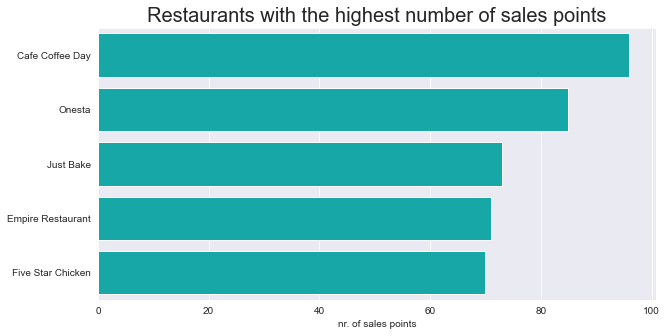

In [20]:
x = df['name'].value_counts()[:5]
y = x.index
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=x, y=y, data=df, color='c')
plt.title("Restaurants with the highest number of sales points", fontsize=20)
plt.xlabel("nr. of sales points")
plt.show()

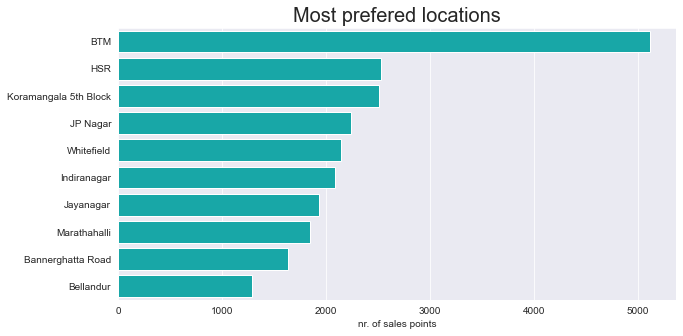

In [21]:
x=df["location"].value_counts()[:10]
y=x.index
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=x, y=y, data=df, color='c')
plt.title("Most prefered locations", fontsize=20)
plt.xlabel("nr. of sales points")
plt.show()

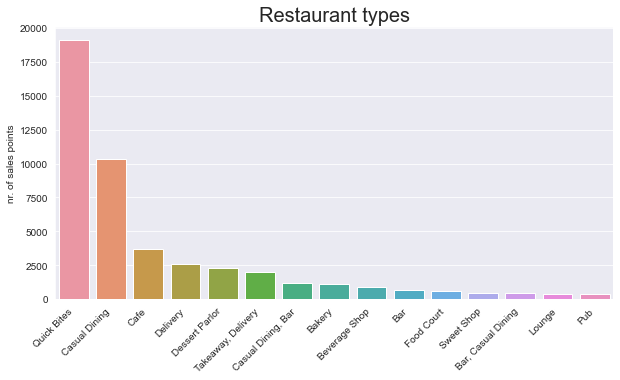

In [22]:
y=df["rest_type"].value_counts()[:15]
x=y.index
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x, y=y, data=df)
plt.title("Restaurant types", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel("nr. of sales points")
plt.show()

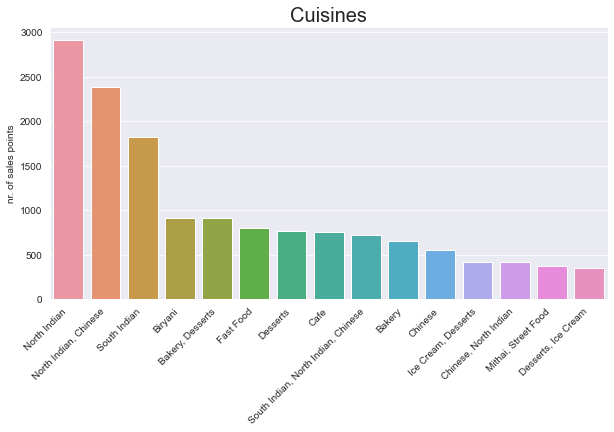

In [23]:
y=df["cuisines"].value_counts()[:15]
x=y.index
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x, y=y, data=df)
plt.title("Cuisines", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel("nr. of sales points")
plt.show()

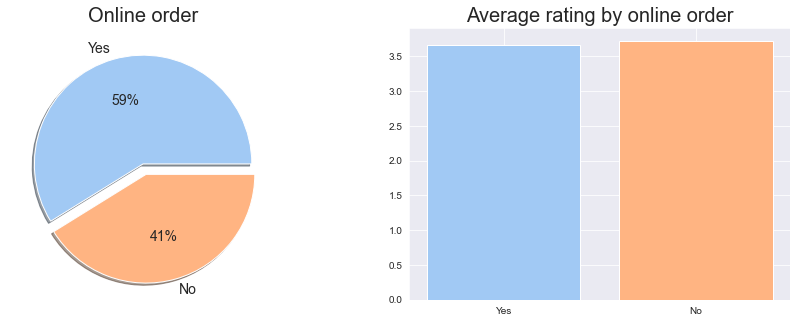

In [24]:
colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(figsize=(15,5))

x = df['online_order'].value_counts()
plt.subplot(1,2,1)
plt.pie(x.values,labels=x.index, colors=colors, explode=[0, 0.1], shadow=True, autopct='%1.0f%%',
       textprops={'fontsize': 14})
plt.title("Online order", fontsize=20)

df['rate'] = df['rate'].apply(lambda x: np.nan if x == "NEW" else float(x))
order_rating = df.groupby('online_order')['rate'].mean()
plt.subplot(1,2,2)
plt.bar(x.index, order_rating, color=colors)
plt.title("Average rating by online order", fontsize=20)
plt.show()

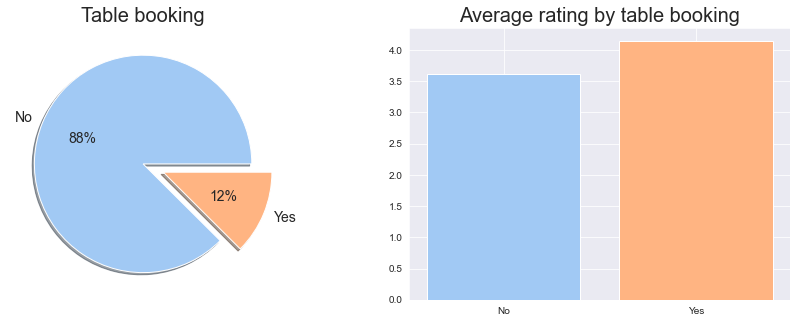

In [25]:
fig, ax = plt.subplots(figsize=(15,5))

x = df['book_table'].value_counts()
plt.subplot(1,2,1)
plt.pie(x.values,labels=x.index, colors=colors, explode=[0, 0.2], shadow=True, autopct='%1.0f%%',
       pctdistance=0.6, labeldistance = 1.1,textprops={'fontsize': 14})
plt.title("Table booking", fontsize=20)

df['rate'] = df['rate'].apply(lambda x: np.nan if x == "NEW" else float(x))
order_rating = df.groupby('book_table')['rate'].mean()
plt.subplot(1,2,2)
plt.bar(x.index, order_rating, color=colors)
plt.title("Average rating by table booking", fontsize=20)
plt.show()

In [26]:
tx = df.groupby('name')['cost_for_two'].max().sort_values(ascending=False)
tx = tx.replace('nan', 0).astype(float)
top_expensive = tx.sort_values(ascending=False).head(5)

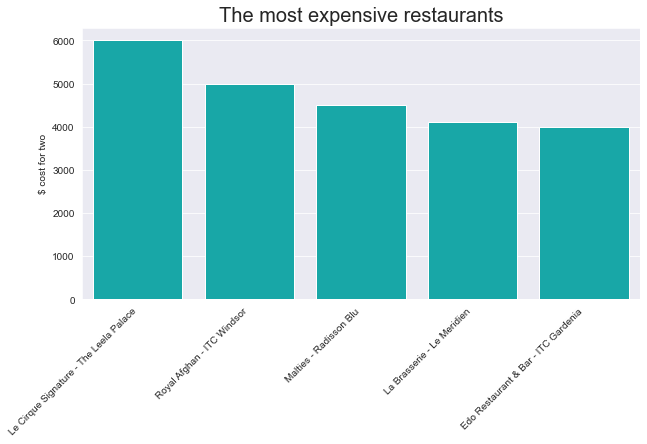

In [27]:
top_expensive = pd.DataFrame(top_expensive)
x=top_expensive['cost_for_two'].index
y=top_expensive['cost_for_two'].values
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x, y=y, data=df, color='c')
plt.title("The most expensive restaurants", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("$ cost for two")
plt.show()